In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation

%matplotlib inline

In [2]:
from fabrik import fabrik_solve
from newton_method import NewtonSolver
from utils import compute_theta, rad2degrees, degrees2rad

class IK:
    @staticmethod
    def solve(target, trajectory, jnts, links, algo='fabrik'):
        if algo == 'fabrik':
            return fabrik_solve(target, trajectory, jnts, links)
        if algo == 'root_finding':
            return NewtonSolver(jnts, links).solve(target, trajectory, jnts, links)

The robot arm is within reach
dist= 0.0011065106945241392
Trajectory size: (4, 4, 2)
[[ 1.  1.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1. 10.]]
[[1.        1.       ]
 [0.6583143 3.9804783]
 [2.1440015 6.586766 ]
 [3.8928964 4.149274 ]]
[[1.        1.       ]
 [0.6120888 3.9748151]
 [2.2742457 6.472261 ]
 [3.991407  4.01231  ]]
[[1.         1.        ]
 [0.60851157 3.9743466 ]
 [2.2845533  6.4624953 ]
 [3.9993675  4.000908  ]]

Angles: (3, 3)
[   6.53990613  -29.68485591 -144.34064945]
[ 0.88944772 -3.96060813 -0.74250303]
[ 0.06890295 -0.31913717 -0.05464493]


<ipython-input-3-11a7c6661ae6>:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


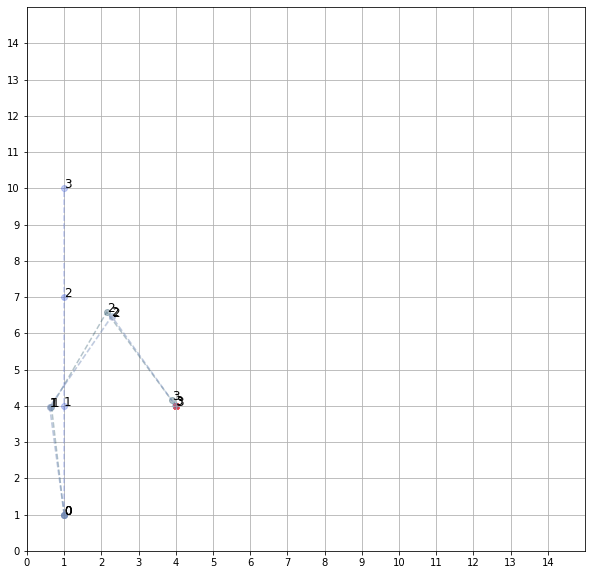

In [3]:
# 2D robotic link (3 links)
'''
    /|--*--*--*
'''
# robot arm topology
links = np.array([3, 3, 3]).astype(np.float32)
jnts = np.array([[1, 1], [1, 4], [1, 7], [1, 10]]).astype(np.float32)
thetas = deegres2rad(np.array([90.0, 90.0, 90.0]))


fig = plt.figure(figsize=(10, 10))

plt.grid()
max_x = 15
max_y = 15
plt.xlim(0, max_x)
plt.ylim(0, max_y)
xdim = np.arange(0, max_x, 1)
ydim = np.arange(0, max_y, 1)
plt.xticks(xdim)
plt.yticks(ydim)

# Move the robot arm and solve IK
# (x, y)
trajectory = [ np.copy(jnts) ]
target = np.array([4, 4])
plt.scatter(target[0], target[1], marker='X', c='r')
trajectory = IK.solve(target, trajectory, jnts, links)
print(f'\nTrajectory size: {trajectory.shape}')

for jnts in trajectory:
    print(jnts)
    color = [*np.random.random(3), 0.3]
    for idx in range(len(jnts)):
        plt.text(jnts[idx][0], jnts[idx][1], str(idx), fontsize=12)
    plt.plot(jnts[:, 0], jnts[:, 1], marker='o', linestyle='--', color=color)

# forward kinematics
angles = []
for idx in range(trajectory.shape[0]):
    theta0 = rad2degrees(compute_theta(trajectory[idx][1], trajectory[idx][0]))
    theta1 = rad2degrees(compute_theta(trajectory[idx][2], trajectory[idx][1]))
    theta2 = rad2degrees(compute_theta(trajectory[idx][3], trajectory[idx][2]))
    angles.append([theta0, theta1, theta2])

angles = np.array(angles)
    
deltas = []
for idx in range(1, len(angles)):
    deltas.append(angles[idx] - angles[idx - 1])
    
deltas = np.array(deltas)

print(f'\nAngles: {deltas.shape}')
for idx in range(deltas.shape[0]):
    print(deltas[idx])

fig.show()